### Load preprocessed1.h5ad

In [19]:
import scanpy as sc
import anndata as ad
import scanpy.external as sce
import pandas as pd
import matplotlib.pyplot as plt
import scvi
import torch

sc.settings.figdir = "/Users/jessica/Documents/GitHub/Jessica_notebooks/figures/batch1/clustering"


In [20]:
adata_p = sc.read("/Users/jessica/Documents/GitHub/Jessica_notebooks/data/batch1/preprocessed1.h5ad")

### Nearest neighbour graph construction and visualization
Using PCA results

In [13]:
sc.pp.neighbors(adata_p)

In [14]:
sc.tl.umap(adata_p)

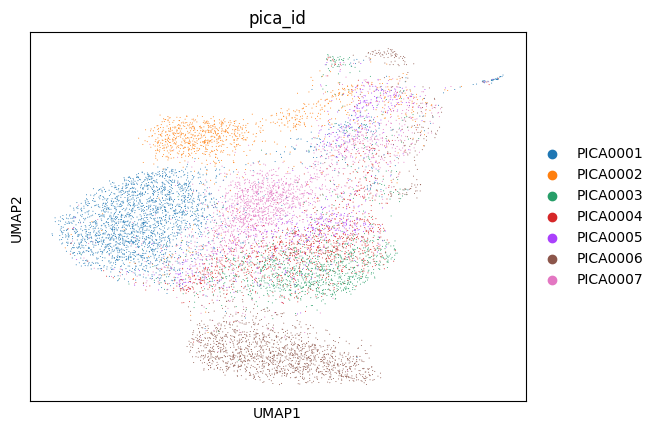

In [15]:
sc.pl.umap(
    adata_p,
    color="pica_id",
    size=2,
)

### Clustering
Leiden graph- clustering method (community detection based on optimizing modularit) like in Seurat

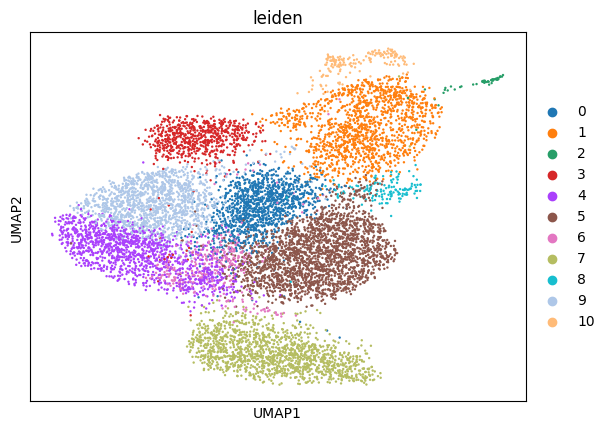

In [16]:
sc.tl.leiden(adata_p, flavor="igraph", n_iterations=2)
sc.pl.umap(adata_p, color=["leiden"])

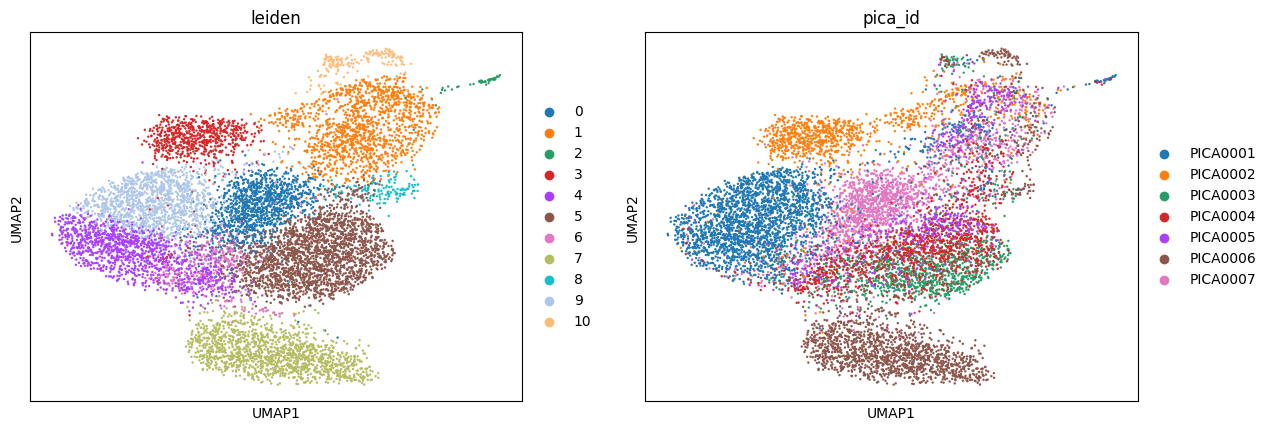

In [18]:
sc.pl.umap(adata_p, color = ['leiden','pica_id'], save="batch1_leiden_pica_id_umap.png")

### batch integration with SCVI

In [ ]:

adata_uncorrected = adata_p.copy()

adata_p.raw = adata_p

scvi.model.SCVI.setup_anndata(adata_p, layer="counts", batch_key="pica_id")

# Train the scVI model
model = scvi.model.SCVI(adata_p)
model.train()


/Users/jessica/mambaforge/envs/scanpy/lib/python3.10/site-packages/scvi/train/_trainrunner.py:69: UserWarning: `accelerator` has been automatically set to `cpu` although 'mps' exists. If you wish to run on mps backend, use explicitly accelerator='mps' in train function.In future releases it will become default for mps supported machines.
  accelerator, lightning_devices, device = parse_device_args(
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/Users/jessica/mambaforge/envs/scanpy/lib/python3.10/site-packages/lightning/pytorch/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
/Users/jessica/mambaforge/envs/scanpy/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:433: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `D

Epoch 222/400:  55%|█████▌    | 221/400 [15:59:11<52:33:41, 1057.10s/it, v_num=1, train_loss_step=7.82e+3, train_loss_epoch=7.79e+3] 

In [ ]:
adata_p.obsm["X_scVI"] = model.get_latent_representation()

#  latent representation 
sc.pp.neighbors(adata_p, use_rep="X_scVI")
sc.tl.umap(adata_p)
sc.tl.leiden(adata_p)


sc.pl.umap(adata_p, color=["leiden", "pica_id"], save="scvi_integrated_umap.png")
